<a href="https://colab.research.google.com/github/Thasneem-vazim/Depression-detection-30-features-with-collected-dataset-/blob/main/Using_Boruta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_rows', None)

In [2]:
depressionDataset = pd.read_csv("/content/binary class.csv")
X = depressionDataset[['AGERNG','GENDER','EDU','PROF','MARSTS','RESDPL','LIVWTH','ENVSAT','POSSAT','FINSTR','DEBT','PHYEX','SMOKE','DRINK','ILLNESS','PREMED','EATDIS','AVGSLP','INSOM','TSSN','WRKPRE','ANXI','DEPRI','ABUSED','CHEAT','THREAT','SUICIDE','INFER','CONFLICT','LOST']]
y=depressionDataset[['DEPRESSED']]


In [3]:
from sklearn.preprocessing import LabelEncoder
### label encode the categorical values and convert them to numbers
le = LabelEncoder()
le.fit(X['AGERNG'].astype(str))
X['AGERNG'] = le.transform(X['AGERNG'].astype(str))

le = LabelEncoder()
le.fit(X['GENDER'].astype(str))
X['GENDER'] = le.transform(X['GENDER'].astype(str))

le = LabelEncoder()
le.fit(X['EDU'].astype(str))
X['EDU'] = le.transform(X['EDU'].astype(str))

le = LabelEncoder()
le.fit(X['PROF'].astype(str))
X['PROF'] = le.transform(X['PROF'].astype(str))


le = LabelEncoder()
le.fit(X['MARSTS'].astype(str))
X['MARSTS'] = le.transform(X['MARSTS'].astype(str))



le = LabelEncoder()
le.fit(X['RESDPL'].astype(str))
X['RESDPL'] = le.transform(X['RESDPL'].astype(str))



le = LabelEncoder()
le.fit(X['LIVWTH'].astype(str))
X['LIVWTH'] = le.transform(X['LIVWTH'].astype(str))



le = LabelEncoder()
le.fit(X['ENVSAT'].astype(str))
X['ENVSAT'] = le.transform(X['ENVSAT'].astype(str))

le = LabelEncoder()
le.fit(X['POSSAT'].astype(str))
X['POSSAT'] = le.transform(X['POSSAT'].astype(str))



le = LabelEncoder()
le.fit(X['FINSTR'].astype(str))
X['FINSTR'] = le.transform(X['FINSTR'].astype(str))

le = LabelEncoder()
le.fit(X['DEBT'].astype(str))
X['DEBT'] = le.transform(X['DEBT'].astype(str))



le = LabelEncoder()
le.fit(X['PHYEX'].astype(str))
X['PHYEX'] = le.transform(X['PHYEX'].astype(str))




le = LabelEncoder()
le.fit(X['SMOKE'].astype(str))
X['SMOKE'] = le.transform(X['SMOKE'].astype(str))



le = LabelEncoder()
le.fit(X['DRINK'].astype(str))
X['DRINK'] = le.transform(X['DRINK'].astype(str))


le = LabelEncoder()
le.fit(X['ILLNESS'].astype(str))
X['ILLNESS'] = le.transform(X['ILLNESS'].astype(str))




le = LabelEncoder()
le.fit(X['PREMED'].astype(str))
X['PREMED'] = le.transform(X['PREMED'].astype(str))



le = LabelEncoder()
le.fit(X['EATDIS'].astype(str))
X['EATDIS'] = le.transform(X['EATDIS'].astype(str))

le = LabelEncoder()
le.fit(X['AVGSLP'].astype(str))
X['AVGSLP'] = le.transform(X['AVGSLP'].astype(str))



le = LabelEncoder()
le.fit(X['INSOM'].astype(str))
X['INSOM'] = le.transform(X['INSOM'].astype(str))




le = LabelEncoder()
le.fit(X['TSSN'].astype(str))
X['TSSN'] = le.transform(X['TSSN'].astype(str))




le = LabelEncoder()
le.fit(X['WRKPRE'].astype(str))
X['WRKPRE'] = le.transform(X['WRKPRE'].astype(str))




le = LabelEncoder()
le.fit(X['ANXI'].astype(str))
X['ANXI'] = le.transform(X['ANXI'].astype(str))




le = LabelEncoder()
le.fit(X['DEPRI'].astype(str))
X['DEPRI'] = le.transform(X['DEPRI'].astype(str))



le = LabelEncoder()
le.fit(X['ABUSED'].astype(str))
X['ABUSED'] = le.transform(X['ABUSED'].astype(str))




le = LabelEncoder()
le.fit(X['CHEAT'].astype(str))
X['CHEAT'] = le.transform(X['CHEAT'].astype(str))



le = LabelEncoder()
le.fit(X['THREAT'].astype(str))
X['THREAT'] = le.transform(X['THREAT'].astype(str))



le = LabelEncoder()
le.fit(X['SUICIDE'].astype(str))
X['SUICIDE'] = le.transform(X['SUICIDE'].astype(str))


le = LabelEncoder()
le.fit(X['INFER'].astype(str))
X['INFER'] = le.transform(X['INFER'].astype(str))


le = LabelEncoder()
le.fit(X['CONFLICT'].astype(str))
X['CONFLICT'] = le.transform(X['CONFLICT'].astype(str))



le = LabelEncoder()
le.fit(X['LOST'].astype(str))
X['LOST'] = le.transform(X['LOST'].astype(str))
le = LabelEncoder()

le.fit(y['DEPRESSED'].astype(str))
y['DEPRESSED'] = le.transform(y['DEPRESSED'].astype(str))


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
!pip install Boruta

     |████████████████████████████████| 56 kB 3.7 MB/s 


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute

X=X_train.to_numpy()
y=y_train.to_numpy().ravel()

print(type(X))
print(type(y))
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	18
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	18
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	18
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	18
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	19
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	19
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	19
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	19
Iteration: 	16 /

In [7]:
print(feat_selector.support_)
print(feat_selector.ranking_)

[ True False False  True False False False False  True False False False
 False False False False False False  True False False  True  True False
 False False False  True False False]
[ 1 13 17  1 19  9 20  3  1  6 17 10 21 22 23 17 12  5  1  8  2  1  1 11
 15  7  4  1  3 14]


In [8]:

X_trainSelectedFeature=pd.DataFrame()

X_trainSelectedFeature['AGERNG']=X_train['AGERNG']
X_trainSelectedFeature['PROF']=X_train['PROF']
X_trainSelectedFeature['POSSAT']=X_train['POSSAT']
X_trainSelectedFeature['INSOM']=X_train['INSOM']
X_trainSelectedFeature['INFER']=X_train['INFER']
X_trainSelectedFeature['ANXI']=X_train['ANXI']
X_trainSelectedFeature['DEPRI']=X_train['DEPRI']







In [9]:
X_testSelectedFeature=pd.DataFrame()

X_testSelectedFeature['AGERNG']=X_test['AGERNG']
X_testSelectedFeature['PROF']=X_test['PROF']
X_testSelectedFeature['POSSAT']=X_test['POSSAT']
X_testSelectedFeature['INSOM']=X_test['INSOM']
X_testSelectedFeature['INFER']=X_test['INFER']
X_testSelectedFeature['ANXI']=X_test['ANXI']
X_testSelectedFeature['DEPRI']=X_test['DEPRI']





In [10]:
X_trainSelectedFeature.shape

(299, 7)

In [11]:
X_testSelectedFeature.shape

(75, 7)

In [12]:
from imblearn.over_sampling import SMOTE
smote=SMOTE('minority',random_state=0)
X_trainSelectedFeatureAfterSMOTE,y_train=smote.fit_resample(X_trainSelectedFeature, y_train)

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        36
           1       0.67      0.92      0.77        39

    accuracy                           0.72        75
   macro avg       0.76      0.71      0.70        75
weighted avg       0.76      0.72      0.71        75



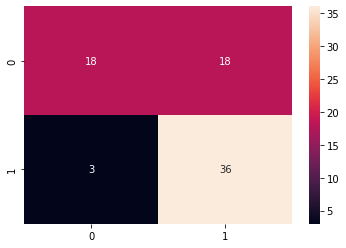

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import time
KNNClassification = KNeighborsClassifier(n_neighbors=7)
KNNClassification.fit(X_trainSelectedFeatureAfterSMOTE,y_train)
y_predict=KNNClassification.predict(X_testSelectedFeature)
from sklearn.metrics import classification_report,confusion_matrix
cm1=confusion_matrix(y_test,y_predict)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predict))





AUC KNN:  0.7849002849002849


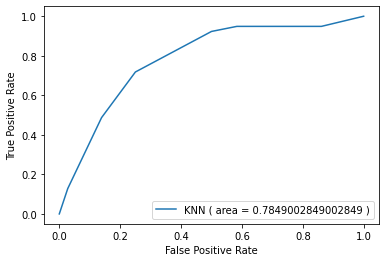

In [15]:
y_predictionKNN_proba=KNNClassification.predict_proba(X_testSelectedFeature)[:,1]
AUCKNN=metrics.roc_auc_score(y_test,y_predictionKNN_proba)
print("AUC KNN: ",AUCKNN)
fprKNN, tprKNN, thresholds = metrics.roc_curve(y_test,y_predictionKNN_proba)

plt.plot(fprKNN,tprKNN,label="KNN ( area = "+str(AUCKNN)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [27]:
prediction=KNNClassification.predict(X_testSelectedFeature)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  72.0


In [17]:
from sklearn.ensemble import AdaBoostClassifier
ADABoostClassification=AdaBoostClassifier()
ADABoostClassification.fit(X_trainSelectedFeatureAfterSMOTE,y_train)
y_predictionADABoost=ADABoostClassification.predict(X_testSelectedFeature)

              precision    recall  f1-score   support

           0       0.79      0.64      0.71        36
           1       0.72      0.85      0.78        39

    accuracy                           0.75        75
   macro avg       0.76      0.74      0.74        75
weighted avg       0.75      0.75      0.74        75



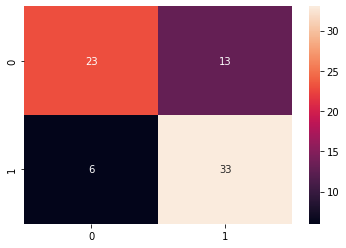

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_test=ADABoostClassification.predict(X_testSelectedFeature)
cm1=confusion_matrix(y_test,y_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predict_test))

AUC KNN:  0.7934472934472934


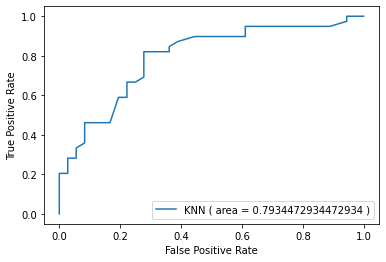

In [19]:
y_predictionKNN_proba=ADABoostClassification.predict_proba(X_testSelectedFeature)[:,1]
AUCKNN=metrics.roc_auc_score(y_test,y_predictionKNN_proba)
print("AUC KNN: ",AUCKNN)
fprKNN, tprKNN, thresholds = metrics.roc_curve(y_test,y_predictionKNN_proba)

plt.plot(fprKNN,tprKNN,label="KNN ( area = "+str(AUCKNN)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [28]:
prediction=ADABoostClassification.predict(X_testSelectedFeature)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  74.66666666666667


              precision    recall  f1-score   support

           0       0.81      0.58      0.68        36
           1       0.69      0.87      0.77        39

    accuracy                           0.73        75
   macro avg       0.75      0.73      0.73        75
weighted avg       0.75      0.73      0.73        75



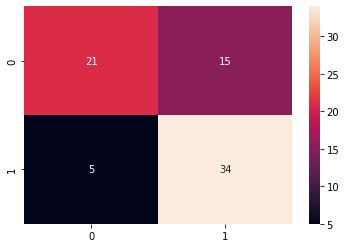

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
GradeintBoostClassification = GradientBoostingClassifier(loss='deviance',max_features=1,random_state=0,max_leaf_nodes=None)
GradeintBoostClassification.fit(X_trainSelectedFeatureAfterSMOTE,y_train)
y_predict=GradeintBoostClassification.predict(X_testSelectedFeature)

cm1=confusion_matrix(y_test,y_predict)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predict))

AUC KNN:  0.8162393162393162


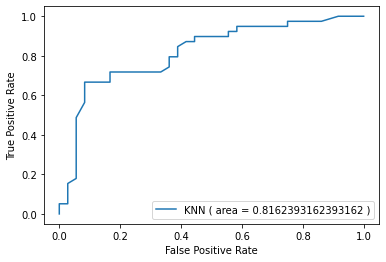

In [21]:
y_predictionKNN_proba=GradeintBoostClassification.predict_proba(X_testSelectedFeature)[:,1]
AUCKNN=metrics.roc_auc_score(y_test,y_predictionKNN_proba)
print("AUC KNN: ",AUCKNN)
fprKNN, tprKNN, thresholds = metrics.roc_curve(y_test,y_predictionKNN_proba)

plt.plot(fprKNN,tprKNN,label="KNN ( area = "+str(AUCKNN)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [29]:
prediction=GradeintBoostClassification.predict(X_testSelectedFeature)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  73.33333333333333


              precision    recall  f1-score   support

           0       0.77      0.64      0.70        36
           1       0.71      0.82      0.76        39

    accuracy                           0.73        75
   macro avg       0.74      0.73      0.73        75
weighted avg       0.74      0.73      0.73        75



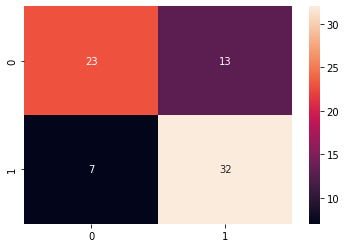

In [22]:
from xgboost import XGBClassifier
import xgboost as xgb
params = {
 'objective':'binary:logistic',
 'max_depth': 1, 'min_child_weight': 1, 'gamma': 0.3, 'subsample': 0.6,
 'colsample_bytree': 0.6, 'scale_pos_weight': 1,
 'alpha': 0.05,
 'learning_rate': 0.03,
 'n_estimators':1484,'seed': 27
 }
XGBoostClassification = XGBClassifier(**params)
XGBoostClassification.fit(X_trainSelectedFeatureAfterSMOTE,y_train)
y_predictionXgBoost=XGBoostClassification.predict(X_testSelectedFeature)
from sklearn.metrics import classification_report,confusion_matrix
cm1=confusion_matrix(y_test,y_predictionXgBoost)
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predictionXgBoost))


AUC Voting:  0.8148148148148149


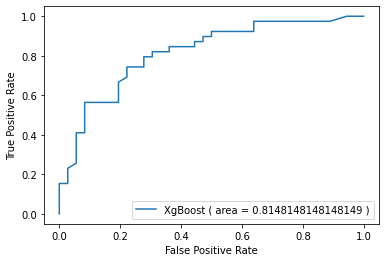

In [23]:
y_predictionXgB_proba=XGBoostClassification.predict_proba(X_testSelectedFeature)[:,1]
AUCXgB=metrics.roc_auc_score(y_test,y_predictionXgB_proba)
print("AUC Voting: ",AUCXgB)

fprXgB, tprXgB, thresholds = metrics.roc_curve(y_test,y_predictionXgB_proba)

plt.plot(fprXgB,tprXgB,label="XgBoost ( area = "+str(AUCXgB)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [30]:
prediction=XGBoostClassification.predict(X_testSelectedFeature)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  73.33333333333333


In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

base_cls = MLPClassifier(random_state=0)

# no. of base classifier
num_trees = 30
seed = 15
# bagging classifier
bagClassificationMLP = BaggingClassifier(base_estimator=base_cls, n_estimators=num_trees, random_state=0)


In [25]:
bagClassificationMLP.fit(X_trainSelectedFeatureAfterSMOTE, y_train)
y_predictionBagMLP = bagClassificationMLP.predict(X_testSelectedFeature)

              precision    recall  f1-score   support

           0       0.81      0.58      0.68        36
           1       0.69      0.87      0.77        39

    accuracy                           0.73        75
   macro avg       0.75      0.73      0.73        75
weighted avg       0.75      0.73      0.73        75



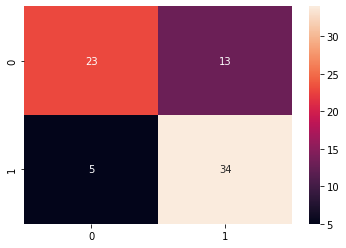

In [32]:
cm1=confusion_matrix(y_test,y_predictionBagMLP)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y_predict))

AUC Bagging with MLP:  0.8425925925925927


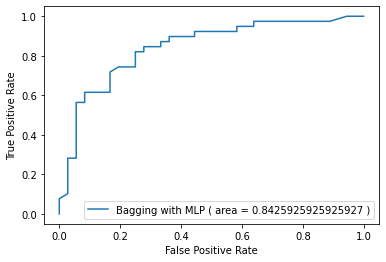

In [33]:
y_predictionBagMLP_proba=bagClassificationMLP.predict_proba(X_testSelectedFeature)[:,1]
AUCBAGMLP=metrics.roc_auc_score(y_test,y_predictionBagMLP_proba)
print("AUC Bagging with MLP: ",AUCBAGMLP)


fprBagMLP, tprBagMLP, thresholds = metrics.roc_curve(y_test,y_predictionBagMLP_proba)

plt.plot(fprBagMLP,tprBagMLP,label="Bagging with MLP ( area = "+str(AUCBAGMLP)+" )")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [34]:
prediction=bagClassificationMLP.predict(X_testSelectedFeature)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  76.0
